In [1]:
import json
import pandas as pd


In [2]:
df=pd.read_json("yelp_academic_dataset_review.json",lines=True,chunksize=1000000)

In [3]:
df

In [4]:
dataset=[]

In [5]:
for chunk in df:
    dataset.append(chunk)
    break;
    

In [6]:
dataset=dataset[0]

In [7]:
dataset

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
999995,t-2o35kr7Q9DSaeuKhaDuQ,oX7o1TH0PHUWp9r9ry9_vw,jLn69WQupjsDKrbPw_nlGQ,3,0,1,0,Never really had any issues here other than th...,2017-11-15 09:43:07
999996,fLIwWCvdul9PNWYfJt5QWA,v8wlapFKVLs2qTYCGhCdiw,t6v8g8UeNiq3O2GoEc7R4Q,4,0,0,0,Fish recently moved a couple of doors down the...,2014-09-03 18:27:33
999997,ETAiy6wEM-r9ve4SKDhBpg,rLlYc1RzIBnOmnX3AbpEYw,ZYRul0i1bhOjirHED6Kd0w,3,0,0,0,I've been to South House around a dozen or so ...,2016-02-20 22:25:29
999998,8OgvSXuc6KjAt2fSz9LuzA,eEH-8CEPU5ndPxDGzVfHiQ,onGXKwnxPLtKnO8yqQMPSA,1,1,0,1,Wow! I am shocked at these reviews. I have tri...,2010-06-27 02:17:30


In [16]:
dataset.shape

(1000000, 9)

In [18]:
dataset["stars"].value_counts()

stars
5    458612
4    221897
1    138625
3    102954
2     77912
Name: count, dtype: int64

In [8]:
data=dataset[["text","stars"]]

In [9]:
data = data.reset_index(drop=True)

In [10]:
data

,text,stars
0,"If you decide to eat here, just be aware it is...",3
1,I've taken a lot of spin classes over the year...,5
2,Family diner. Had the buffet. Eclectic assortm...,3
3,"Wow! Yummy, different, delicious. Our favo...",5
4,Cute interior and owner (?) gave us tour of up...,4
...,...,...
999995,Never really had any issues here other than th...,3
999996,Fish recently moved a couple of doors down the...,4
999997,I've been to South House around a dozen or so ...,3
999998,Wow! I am shocked at these reviews. I have tri...,1


In [11]:
balanced_dataset = pd.concat([data[data['stars'] == star].sample(2000) for star in data['stars'].unique()])

In [12]:
balanced_dataset.reset_index(drop=True, inplace=True)

In [13]:
balanced_dataset["stars"].value_counts()

stars
3    2000
5    2000
4    2000
1    2000
2    2000
Name: count, dtype: int64

In [14]:
balanced_dataset.to_csv("review.csv")

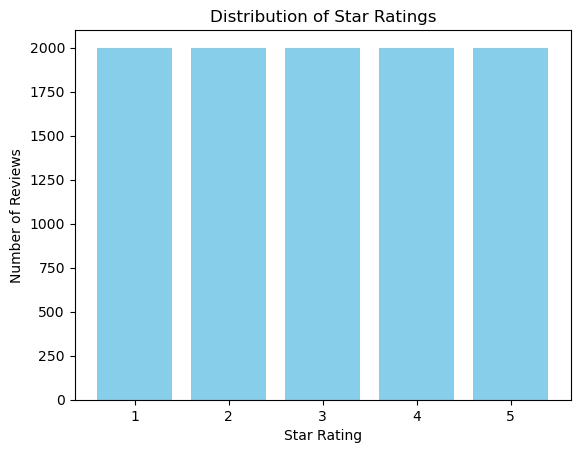

In [15]:
import matplotlib.pyplot as plt

# Count the occurrences of each star rating
star_counts = balanced_dataset['stars'].value_counts().sort_index()

# Plot the bar chart
plt.bar(star_counts.index, star_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')

# Show the plot
plt.show()


In [20]:
data["text"][0]

"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker."